In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import joblib

In [2]:
np.random.seed(42)
m = 1000  # Number of samples
X = np.random.rand(m, 3) * 10  # 3 features
y = 2 * X[:, 0] + 3 * X[:, 1] - 1.5 * X[:, 2] + np.random.randn(m)  # Linear relationship with noise

                x1           x2           x3            y
count  1000.000000  1000.000000  1000.000000  1000.000000
mean      5.119800     4.942249     4.934747    17.666512
std       2.868364     2.962779     2.916940    11.510003
min       0.001347     0.000116     0.013536   -10.540932
25%       2.585267     2.351339     2.409945     8.676006
50%       5.182531     5.087306     4.930858    17.849392
75%       7.612538     7.599536     7.339353    26.465943
max       9.997177     9.983475     9.966969    46.439289


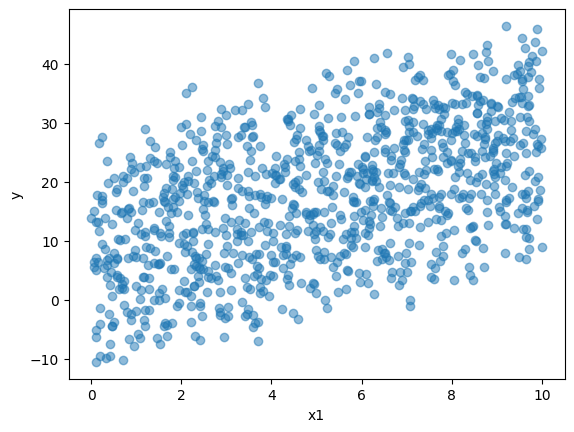

In [3]:
df = pd.DataFrame(X, columns=["x1", "x2", "x3"])
df["y"] = y
print(df.describe())
plt.scatter(df["x1"], df["y"], alpha=0.5)
plt.xlabel("x1")
plt.ylabel("y")
plt.show()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Initialize model
dt_model = DecisionTreeRegressor(random_state=42)

# Hyperparameter grid
param_grid = {
    "max_depth": [3, 5, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "ccp_alpha": [0, 0.01, 0.1]  # Pruning strength
}

# Grid search
grid_search = GridSearchCV(dt_model, param_grid, cv=5, scoring="neg_mean_squared_error")
grid_search.fit(X_train, y_train)

# Best model
best_dt = grid_search.best_estimator_
print(f"Best Params: {grid_search.best_params_}")

Best Params: {'ccp_alpha': 0, 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2}


Test MSE: 6.6744
Test R²: 0.9498


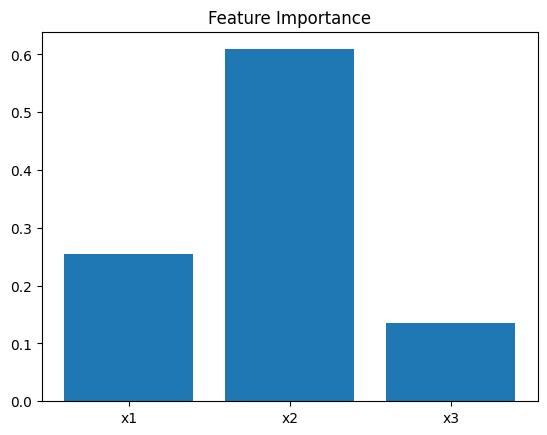

In [6]:
y_pred = best_dt.predict(X_test)
print(f"Test MSE: {mean_squared_error(y_test, y_pred):.4f}")
print(f"Test R²: {r2_score(y_test, y_pred):.4f}")

# Feature importance
plt.bar(range(X.shape[1]), best_dt.feature_importances_)
plt.xticks(range(X.shape[1]), ["x1", "x2", "x3"])
plt.title("Feature Importance")
plt.show()